# Crash course for the impatient

This crash course is intended to illustrate the main concepts
involved when using Python for data analysis in less than 30 minutes.

## Language syntax

Python has a very straightforward syntax:

1.  Everything following a `#` is a comment.
2.  Names are case sensitive.
3.  Variables are dynamically typed and are created by assignment:

    ```
    varname = value
    ```
4.  There is no need to terminate a statement with `;`
5.  Indentation matters and is used to group blocks of code such
    as functions.

### Built-in data types

For data analysis, the most important built-in data types are
integers, floats, strings and lists.

In [1]:
x = 1           # integer
x = 1.0         # floating-point number (float)
x = 'abc'       # string
x = [1, 2, 3]   # list

### Indexing
Lists and other containers are indexed using brackets `[]`.
Python indices start at 0:

In [2]:
x = [1, 2, 3]       # list containing 3 integers
x[0]                # returns first item

1

Negative integer values index items from the *end* of the list:

In [3]:
x[-1]               # returns last item

3

Ranges of items can be selected using slices, which
are triples of the form `start:stop:step`. Any of the three tokens
can be omitted. `stop` is not included in the selection:

In [4]:
x = [1,2,3]         # create list of three integers

x[:]                # all items; equivalent to x[::], or just x
x[::2]              # every second item, returns [1, 3]
x[1:3]              # second and third items, returns [2, 3]
x[::-1]             # all items in reverse order, returns [3, 2, 1]

[3, 2, 1]

***
## NumPy arrays

We store numerical data in NumPy arrays. NumPy is not part of the
standard library and has to be imported before usage:
```
import numpy as np
```
### Creating arrays
NumPy arrays can be created using a number of ways:

In [5]:
import numpy as np
x = np.array([1, 2, 3])         # integer array from list
x = np.array([1.0, 2.0, 3.0])   # floating-point array from list

x = np.arange(10)               # range of integers 0,...,9
x = np.linspace(0.0, 1.0, 11)   # 11 floats uniformly spaced on [0, 1]

x = np.zeros((3,3))             # 3x3 matrix of zeros
x = np.ones(10)                 # 10-element vector of ones

### Element-wise operations
With NumPy, the default is to apply operators element-by-element
(unlike in Matlab, where you would use `.*` for element-wise multiplication):

In [6]:
import numpy as np
x = np.arange(5)                # vector [0,1,2,3,4]
y = np.arange(5,10)             # vector [5,6,7,8,9]

# resulting vector is of the same size
x + y                           # vector [5,7,9,11,13]
x * y
x - y
x / y

array([0.        , 0.16666667, 0.28571429, 0.375     , 0.44444444])

### Matrix operations

Matrix-matrix and matrix-vector multiplication is performed
using the `np.dot()` function, or alternatively, the `@` operator:

In [7]:
import numpy as np

# create 2x3 matrix
mat = np.array([[1, 2, 3],
                [4, 5, 6]])
mat                             # print matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
# create length-2 vector
vec = np.array([1, 2])
vec                             # print vector

array([1, 2])

In [9]:
# vector-matrix multiplication
np.dot(vec, mat)                # or vec @ mat

array([ 9, 12, 15])

In [10]:
# matrix-matrix multiplication
np.dot(mat, mat.T)              # or mat @ mat

array([[14, 32],
       [32, 77]])

We use `.T` to transpose a matrix.

### NumPy functions
NumPy implements the usual gamut of mathematical
functions you'd expect, such as:

In [11]:
import numpy as np
x = np.arange(1,5)              # integers 1,...,5

np.sqrt(x)                      # square root
np.exp(x)                       # exponential function
np.log(x)                       # natural logarithm
np.sin(x)                       # sine function


array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

***
## Plotting

The most common plotting library used in Python is *matplotlib*.
To use it, we need to import it as follows:
```
import matplotlib.pyplot as plt
```
The main plotting routine is `plot()` which displays lines;
other useful routines are `scatter()` and `bar()`.

The following code demonstrates how to plot some randomly generated
data:

Text(0.5, 1.0, 'Bar plot')

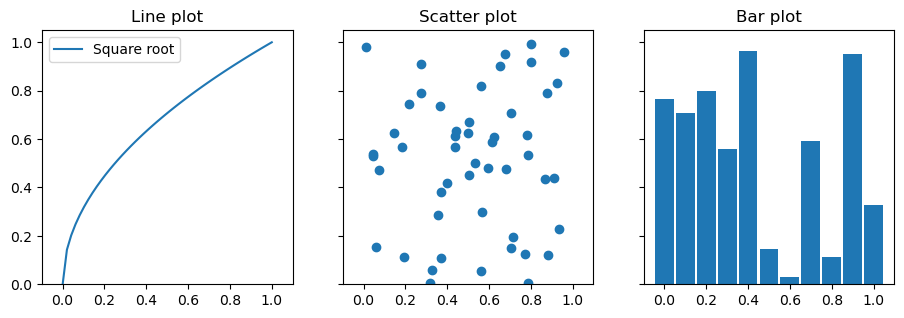

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with three panels (axes) arranged in three columns
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(11,3.3))

# plot square-root function
xvalues = np.linspace(0.0, 1.0, 50)
ax[0].plot(xvalues, np.sqrt(xvalues), label='Square root')
ax[0].legend()
ax[0].set_title('Line plot')

# scatter plot of random uniformly distributed data
np.random.seed(1234)
xvalues = np.random.rand(50)
yvalues = np.random.rand(50)
ax[1].scatter(xvalues, yvalues)
ax[1].set_title('Scatter plot')

xvalues = np.linspace(0.0, 1.0, 11)
yvalues = np.random.rand(len(xvalues))
ax[2].bar(xvalues, yvalues, 0.09)
ax[2].set_title('Bar plot')

***
## Functions

Functions are the most important way to reuse and encapsulate code.
They are defined using the `def` keyword. The function body is written
as an indented block:
```
def func(x):
    # perform computations on x
    return y
```
For example, assume that we have a 3rd-order polynomial given by
$$p(x; \alpha) = \alpha x^3 + b_2 x^2 + b_1 x + b_0$$

where $\alpha$ is a parameter and $b_2$, $b_1$ and $b_0$ are fixed.
A function to evaluate this polynomial could be implemented as follows:

In [13]:
def poly(x, alpha=1.0):
    b2 = - 2.0
    b1 = 1.0
    b0 = -2.0
    p = alpha * x**3.0 + b2 * x**2.0 + b1 * x + b0
    return p

We can use this definition to evaluate
and plot the polynomial for various values of $\alpha$.

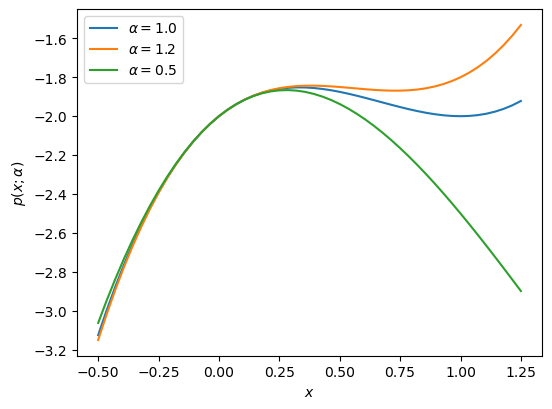

In [14]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(-0.5, 1.25, 50)

fig, ax = plt.subplots(1,1, figsize=(6, 4.5))

# Evaluate polynomial with alpha = 1.0
yvalues = poly(xvalues, alpha=1.0)
ax.plot(xvalues, yvalues, label=r'$\alpha=1.0$')

# Evaluate polynomial with alpha = 1.2
yvalues = poly(xvalues, alpha=1.2)
ax.plot(xvalues, yvalues, label=r'$\alpha=1.2$')

# Evaluate polynomial with alpha = 0.5
yvalues = poly(xvalues, alpha=0.5)
ax.plot(xvalues, yvalues, label=r'$\alpha=0.5$')

ax.set_xlabel('$x$')
ax.set_ylabel(r'$p(x; \alpha)$')
ax.legend()

Note that *matplotlib* allows us to use $\LaTeX$ symbols in labels
and legends.


***
## Working with data

### Loading data

The `data/` directory contains the text file `FRED.csv`
of comma-separated annual U.S. data for the following variables:

-   real GDP (in billions of chained 2012 dollars);
-   the consumer price index (CPI); and
-   the unemployment rate (UNRATE, in percent).

The data was downloaded from the [FRED database](https://fred.stlouisfed.org/),
a standard source for macroeconomic time series.

The first two rows of this data are

| Year |  GDP   |  CPI | UNRATE |
| ---- | ------ | ---- | ------ |
| 1948 | 2118.5 | 24.0 | 3.8    |
| 1949 | 2106.6 | 23.8 | 6.0    |

We use the `loadtxt` function to read the CSV file into a
NumPy array as follows:

In [15]:
import numpy as np

filename = '../data/FRED.csv'
# Load data into NumPy array
data = np.loadtxt(filename, delimiter=',', skiprows=1)
# Print first 5 rows of data
data[:5]

array([[1948. , 2118.5,   24. ,    3.8],
       [1949. , 2106.6,   23.8,    6. ],
       [1950. , 2289.5,   24.1,    5.2],
       [1951. , 2473.8,   26. ,    3.3],
       [1952. , 2574.9,   26.6,    3. ]])

### Visualising data
We can now proceed to analyse the data. First, we plot
all three time series in separate graphs (since their scales
are vastly different).

Text(0, 0.5, 'Percent')

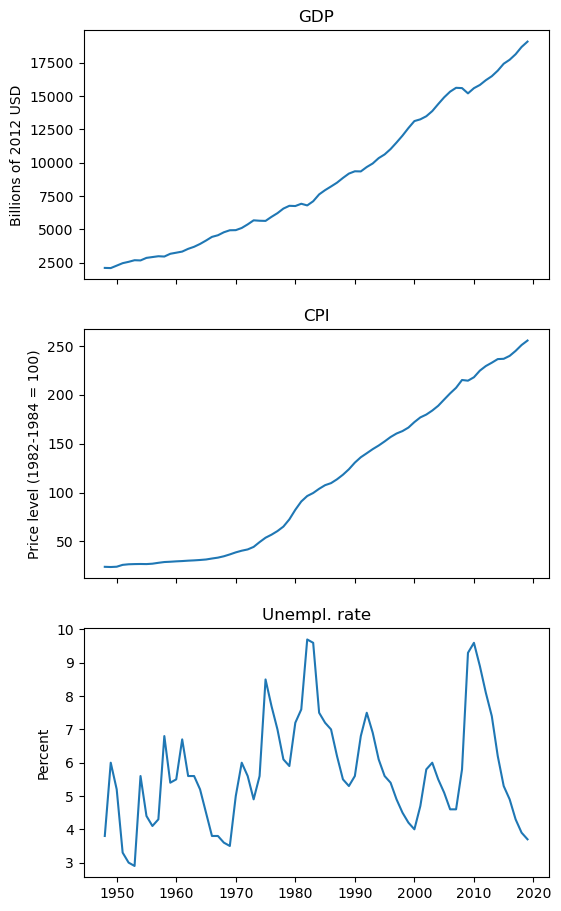

In [16]:
import matplotlib.pyplot as plt

# Split array into separate time series
# Years are in the first column; convert them to integer values
years = np.array(data[:, 0], dtype=int)

gdp = data[:, 1]    # GDP in column 2
cpi = data[:, 2]    # CPI in column 3
unr = data[:, 3]    # unemployment rate in column 4

# create figure and 3 sub-plots, each in a new row
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(6, 11))

# Plot GDP in first panel
ax[0].plot(years, gdp)
ax[0].set_title('GDP')
ax[0].set_ylabel('Billions of 2012 USD')

# Plot CPI in second panel
ax[1].plot(years, cpi)
ax[1].set_ylabel('Price level (1982-1984 = 100)')
ax[1].set_title('CPI')

# Plot unemployment rate in third panel
ax[2].plot(years, unr)
ax[2].set_title('Unempl. rate')
ax[2].set_ylabel('Percent')


### Transforming data

GDP and CPI levels are not that informative, so let's transform them to
annual growth rates.

-   We do this by defining a function that accepts a vector as input
    and computes the percentage changes.
-   The output vector has one fewer element as we need two observations
    to compute a growth rate.

In [17]:
# Define function to compute growth rates
def growth_rate(x):
    # Compute absolute difference: subtract lagged observations
    diff = x[1:] - x[:-1]
    # Growth rate = relative difference
    # Return growth rates in percent!
    reldiff = (diff / x[:-1]) * 100.0
    return reldiff

# Apply function to GDP and CPI
gdp_growth = growth_rate(gdp)
cpi_growth = growth_rate(cpi)       # CPI growth rate, a.k.a. inflation

We can now plot the growth rates. Since they will be of
similar magnitude, we use a single graph.

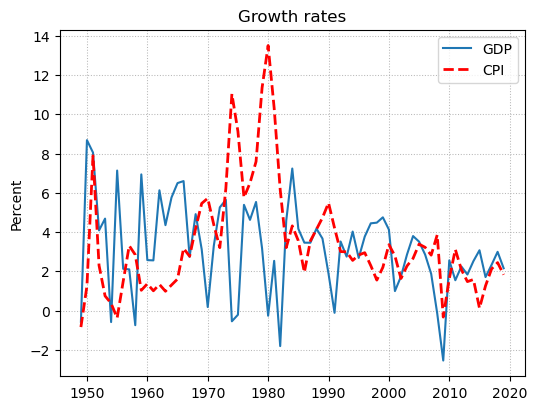

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6,4.5))
ax.plot(years[1:], gdp_growth, label='GDP')
ax.plot(years[1:], cpi_growth, label='CPI', color='red', linestyle='--', linewidth=2.0)
ax.set_ylabel('Percent')
ax.set_title('Growth rates')
ax.legend()
ax.grid(linestyle=':', alpha=0.9, linewidth=0.75, zorder=-100)

### Summary statistics

We can compute some summary statistics for all three time series
using functions such as `np.mean()` and `np.std()`,
where the latter returns the standard deviation:

In [19]:
def print_stats(name, x):
    # Define formatting string to print results
    fmt = '{:12s}: mean = {:.2f}, std. dev. = {:.2f}'
    mean = np.mean(x)
    std = np.std(x)
    print(fmt.format(name, mean, std))

# GDP growth rate
print_stats('GDP growth', gdp_growth)
# CPI growth rate = inflation
print_stats('Inflation', cpi_growth)
# Unempl. rate
print_stats('Unempl. rate', unr)

GDP growth  : mean = 3.17, std. dev. = 2.30
Inflation   : mean = 3.42, std. dev. = 2.77
Unempl. rate: mean = 5.73, std. dev. = 1.61


We can of course also plot these moments, for example using
a bar graph:

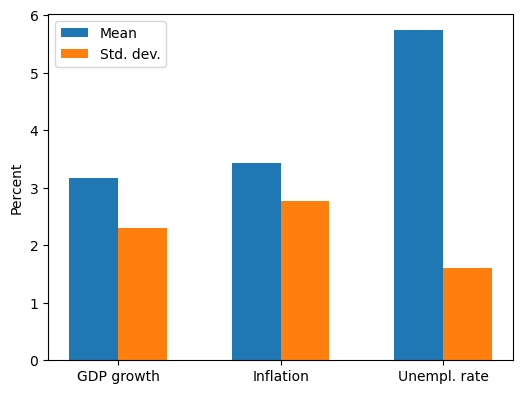

In [20]:
labels = ['GDP growth', 'Inflation', 'Unempl. rate']
means = [np.mean(x) for x in (gdp_growth, cpi_growth, unr)]
stds = [np.std(x) for x in (gdp_growth, cpi_growth, unr)]
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
width = 0.3
xticks = np.arange(3)
ax.bar(xticks - width/2.0, means, width, label='Mean')
ax.bar(xticks + width/2.0, stds, width, label='Std. dev.')
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
ax.set_ylabel('Percent')
ax.legend(loc='upper left')

## Next steps

This truly was a crash course, conveying the minimum information
necessary to get you started with data analysis using Python.

We will flesh out these concepts in much more detail in the next
few units.